# Genome Identifier
## Ideia inicial:
Fazer um programa que crie um gráfico com a quantidade de aminoácidos com determinadas sequências de DNA. 

Sites para referência:

- https://www.ncbi.nlm.nih.gov/
- https://biolm.ai/guides/esmfold/
- https://disi.unitn.it/~teso/courses/sciprog/python_dictionaries.html
- https://www.researchgate.net/figure/The-amino-acids-and-their-three-letter-and-one-letter-codes_tbl1_220176841
- https://blast.ncbi.nlm.nih.gov/Blast.cgi#alnHdr_1774775119

Links de sequencias:
- https://www.ncbi.nlm.nih.gov/nuccore/NC_001542.1?report=fasta
- https://www.ncbi.nlm.nih.gov/nuccore/NC_006429.1?report=fasta
- https://www.ncbi.nlm.nih.gov/nuccore/NC_003243.1?report=fasta

Etapas importantes:
- Transformar a sequência de DNA em uma sequência RNAm equivalente
- Dada uma sequência RNAm, definir os aminoácidos dela.
    - Identificar o códon de start (metionina, AUG)
    - Identificar os códons e os aminoácidos correspondentes
    - Guardar em uma string as ocorrências
- Plotar em um gráfico as ocorrências de certo aminoácido
    - Separar por ocorrência
    - Separar por tipo (hidrofóbico, hidrofílico...) 
        - Colocar a porcentagem de cada tipo [FALTA]
        - Plota um gráfico só por tipo [FALTA]
- Comparar duas sequências diferentes. 
    - Criar uma função que faz a função genome_identifier para 2 sequências para comparar [FALTA]
    - Mostrar quais as semelhanças e diferenças (quantidade de proteínas e tipos iguais...) [FALTA]
    - Indicar uma porcentagem de semelhança entre eles com base em seus genomas [FALTA]

In [8]:
# INFOS IMPORTANTES E DEFINIÇÕES

aminoacids = {
    'A': ['GCU','GCU','GCA','GCG'], #alanine
    'R': ['CGU','CGC','CGA','CGG','AGA','AGG'], #arginine
    'N': ['AAU','AAC'], #asparagine
    'D': ['GAU','GAC'], #aspartic_acid
    'C': ['UGU','UGC'], #cysteine
    'E': ['GAA','GAG'], #glutamine_acid
    'Q': ['CAA','CAG'], #glutamine
    'G': ['GGU','GGC','GGA','GGG'], #glycine 
    'H': ['CAU','CAC'], #histidine
    'I': ['AUU','AUC','AUA'], #isoleucine
    'L': ['UUA','UUG','CUU','CUC','CUA','CUG'], #leucine
    'K': ['AAA','AAG'], #lysine
    'M': ['AUG'], #methionine_start
    'F': ['UUU','UUC'], #phenylalanine
    'P': ['CCU','CCC','CCA','CCG'], #proline
    'S': ['UCU','UCC','UCA','UCG','AGU','AGC'], #serine
    'T': ['ACU','ACC','ACA','ACG'], #threonine
    'W': ['UGG'], #tryptophan
    'Y': ['UAU','UAC'], #tyrosine
    'V': ['GUU','GUC','GUA','GUG'], #valine
    'stop': ['UGA','UAA','UAG'] #stop
}

codons = {
    'GCU': 'A', #alanine
    'GCC': 'A',
    'GCA': 'A',
    'GCG': 'A',
    'CGU': 'R', #arginine
    'CGC': 'R',
    'CGA': 'R',
    'CGG': 'R',
    'AGA': 'R',
    'AGG': 'R',
    'AAU': 'N', #asparagine
    'AAC': 'N',
    'GAU': 'D', #aspartic_acid
    'GAC': 'D',
    'UGU': 'C', #cysteine
    'UGC': 'C', 
    'GAA': 'E', #glutamine_acid
    'GAG': 'E', 
    'CAA': 'Q', #glutamine
    'CAG': 'Q', 
    'GGU': 'G', #glycine
    'GGC': 'G',
    'GGA': 'G',
    'GGG': 'G',  
    'CAU': 'H', #histidine
    'CAC': 'H', 
    'AUU': 'I', #isoleucine
    'AUC': 'I',
    'AUA': 'I',
    'UUA': 'L', #leucine
    'UUG': 'L',
    'CUU': 'L',
    'CUC': 'L',
    'CUA': 'L',
    'CUG': 'L',
    'AAA': 'K', #lysine
    'AAG': 'K',
    'AUG': 'M', #methionine_start
    'UUU': 'F', #phenylalanine
    'UUC': 'F',
    'CCU': 'P', #proline
    'CCC': 'P',
    'CCA': 'P',
    'CCG': 'P',
    'UCU': 'S', #serine
    'UCC': 'S',
    'UCA': 'S',
    'UCG': 'S',
    'AGU': 'S',
    'AGC': 'S',
    'ACU': 'T', #threonine
    'ACC': 'T',
    'ACA': 'T',
    'ACG': 'T',
    'UGG': 'W', #tryptophan
    'UAU': 'Y', #tyrosine
    'UAC': 'Y',
    'GUU': 'V', #valine
    'GUC': 'V',
    'GUA': 'V',
    'GUG': 'V',
    'UGA': 'stop', #stop
    'UAA': 'stop',
    'UAG': 'stop',
}

#classificar os aminoácidos
hidrofobico = ['G','A','V','L','I','M','F','W','P']
hidrofilico_neutro = ['S','T','C','Y','N','Q']
hidrofilico_negativo = ['D','E'] 
hidrofilico_positivo = ['K','R','H']

# codons_validos = [y for x in codons.values() for y in x]

In [9]:
# identificar o códon de start. pode receber uma sequência típica DNA ou RNA.
def tratamento_str(string):
    '''Elimina os números e espaços de uma sequência, além de deixá-la em maiúscula'''
    pre_t = ['\n', ' ', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0']
    for i in pre_t:
        string = string.replace(i, '')
    return string.upper()

def onde_esta_aug(string, DNA=False):
    '''Recebe uma string com uma sequência de nucleotídeos, identifica o códon de start e retorna a sequência de RNA a partir 
    dele. Pode receber como argumento uma sequência RNA ou DNA.'''
    string = tratamento_str(string)
    
    if DNA:
        string = string.replace('T', 'U') # Transformar a sequência de DNA em uma sequência RNAm equivalente
        
    i = string.find('AUG') # Identificar o códon de start (metionina, AUG)
    
    return '' if i == -1 else string[i:]

# identificar os aminoácidos a partir dos códons
def id_aminoacidos(seq):
    '''Recebe uma sequência de códons e transforma em uma sequência de aminoácidos.'''
    aminoacidos_sequenciados = '' # Guardar em uma string as ocorrências
    resto_seq = ''
    
    for i in range(0, len(seq) - 2, 3):
        cdn = seq[i:(i+3)] # pega os códons de 3 em 3
        if cdn in codons.keys():
            if codons[cdn] == 'stop': # para a tradução
                resto_seq = seq[i+3:]
                return aminoacidos_sequenciados, resto_seq
            else:
                aminoacidos_sequenciados += codons[cdn]
        else:
            aminoacidos_sequenciados += 'X' # Um aminoácido não identificado.
            
    return aminoacidos_sequenciados, resto_seq

# calcula a quantidade de ocorrências de cada aminoácido
def ocorrencias_aminoacidos(seq):
    '''Calcula a quantidade de ocorrências de uma substring em uma string e retorna um dicionário.'''
    qtd_ocorrencias = {x : seq.count(x) for x in seq} # cria um dicionário relacionando cada amino com a qtd de ocorrências
    return qtd_ocorrencias

import matplotlib.pyplot as plt
from datetime import datetime

# plota um gráfico de ocorrências e agrupa por cores a partir da natureza polar/apolar do aminoácido
def grafico_ocorrencias(dicio, nome='occurrences'):
    '''Plota um gráfico a partir de uma sequência de aminoácidos.'''
    for i in dicio.keys():
        if i in hidrofobico:
            plt.bar(i, dicio[i], color='orange')
        elif i in hidrofilico_neutro:
            plt.bar(i, dicio[i], color='blue')
        elif i in hidrofilico_negativo:
            plt.bar(i, dicio[i], color='red')
        elif i in hidrofilico_positivo:
            plt.bar(i, dicio[i], color='green')
        else:
            plt.bar(i, dicio[i], color='black')
    
    plt.xlabel('Aminoácidos')
    plt.ylabel('Quantidade')
    plt.title('Gráfico de aminoácidos de uma sequência')
    nome_grafico = nome + str(datetime.now())[-6:]
    plt.savefig(f'{nome_grafico}.png', bbox_inches='tight')
    plt.show()

In [82]:
def grafico_porcentagem(dicio, nome='porcentagem'):
    '''Plota um gráfico a partir de uma sequência de aminoácidos.'''
    hidro_fobico = 0
    hidro_filico_neutro = 0
    hidro_filico_negativo = 0
    hidro_filico_positivo = 0
    outros = 0
    
    for i in dicio:
        if i in hidrofobico:
            hidro_fobico += 1
        elif i in hidrofilico_neutro:
            hidro_filico_neutro += 1 
        elif i in hidrofilico_negativo:
            hidro_filico_negativo += 1
        elif i in hidrofilico_positivo:
            hidro_filico_positivo += 1
        else:
            outros += 1
    
    labels = ['Hidrofóbico', 'Hidrofílico neutro', 'Hidrofílico negativo', 'Hidrofílico positivo', 'Outros']
    size = [hidro_fobico, hidro_filico_neutro, hidro_filico_negativo, hidro_filico_positivo, outros]
    size_final = []
    labels_final = []
    
    for i in range(len(size)):
        if size[i] != 0:
            size_final.append(size[i])
            labels_final.append(labels[i])
            
    plt.pie(size_final, labels = labels_final, colors = ['orange','blue','red','green','black'],autopct='%1.1f%%')
    plt.title('Porcentagem dos tipos de aminoácidos')
    plt.savefig(f'{nome}.png', bbox_inches='tight')
    plt.show()

In [63]:
def genome_identifier(gen_code, isDNA=False):
    
    aminoacidos_identificados = ''
    lista_amino = []
    
    while gen_code:
        sequence_starter = onde_esta_aug(gen_code, isDNA)
        aa_sequence, gen_code = id_aminoacidos(sequence_starter)
        aminoacidos_identificados += aa_sequence
        lista_amino.append(aa_sequence)
        
    dict_occurrences = ocorrencias_aminoacidos(aminoacidos_identificados)
    print(lista_amino, len(lista_amino))
    grafico_ocorrencias(dict_occurrences)
    grafico_porcentagem(dict_occurrences)

['MRRFLGSSGAKSRSWQGLFG'] 1


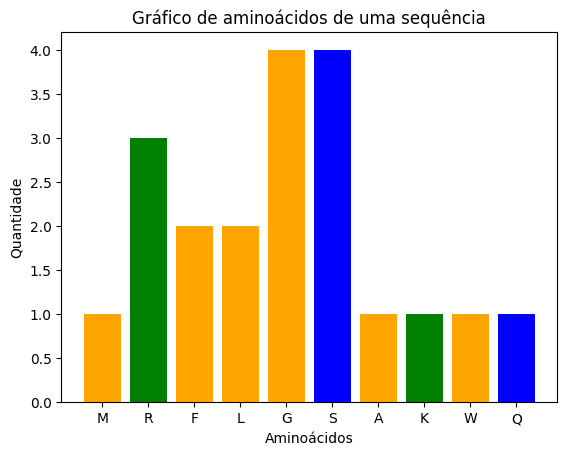

TypeError: object of type 'int' has no len()

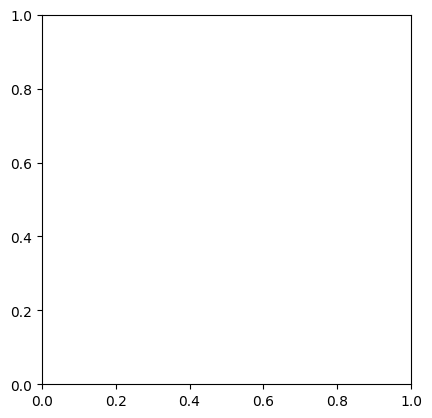

In [81]:
COD = 'ATGAGACGTTTCCTTGGCTCTTCTGGCGCCAAAAGTCGTTCGTGGCAGGGGTTATTCGGCTGA'
genome_identifier(COD, isDNA=True)

['MTLNNQIKEDTDSISDLNKM', 'MESDKIVFKVNNQVVSLKPEVISDQYEYKYPAILDGKKPGITLGKAPDLNTAYKSILSGMKAAKLDPDDVCSYLAAAMHLFEGVCPEDWVSYGIVIAKKGEKINPSVIVDIVRTNVEGNWAQAGGTDVIRDPTMAEHASLVGLLLCLYRLSKIVGQNTANYKTNVADRMEQIFETAPFAKVVEHHTLMTTHKMCANWSTIPNFRFLVGTYDMFFARVEHIYSALRVGTVVTAYEDCSGLVSFTGFIKQINLSPRDALLYFFHKNFEGEIKRMFEPGQETAVPHSYFIHFRALGLSGKSPYSSNAVGHTFNLIHFVGCYMGQIRSLNATVIQTCAPHEMSVLGGYLGEEFFGKGTFERRFFRDEKEMQDYTELEEARVEASLADDGTVDSDEEDFFSGETRSPEAVYSRIMMNNGKLKKVHIRRYIAVSSNHQARPNSFAEFLNKVYADGS', 'MIYRGVLL', 'MSKDLVHPSLIRAGIVELEMAEETTDLINRTIESNQAHLQGEPLYVDSLPEDMSRLRIEDKSRRTKTEEEERDEGSSEEDNYLSEGQDPLIPFQNFLDEIGARAVKRLKTGEGFFRVWSALSDDIKGYVSTNIMTSGERDTKSIQIQTEPTASVSSGNESRHDSESMHDPNDKKDHTPDHDVVPDIESSTDKGEIRDIEGEVAHQVAESFSKKYKFPSRSSGIFLWNFEQLKMNLDDIVKAAMNVPGVERIAEKGGKLPLRCILGFVALDSSKRFRLLADNDKVARLIQEDINSYMARLEEAE', 'MEKTCNIPKKMNFLKKMIKSCKDEETQKYPSASAPPDDDDIWMPPPEYVPLTQVKGKASVRNFCISGEVKICSPNGYSFKILRHILKSFDNVYSGNRRMIGLVKVVIGLVLSGSPVPEGMNWVYKLRRTLIFQWAESHGPLEGEELEYSQEITWDDEAEFVGLQIRVSARQCHIQGRLWCINMNSRACQLWADMILQTQQS

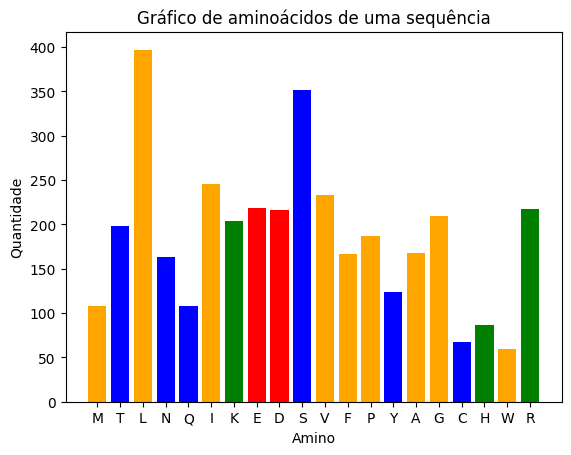

In [5]:
COD = '''AUGACGCTTAACAACCAGATCAAAGAAGACACAGATAGTATCAGTGACCTAAACAAAATGTAACACTCCTACA
ATGGAGTCTGACAAGATTGTGTTCAAGGTGAATAACCAAGTTGTTTCTTTGAAGCCTGAGGTCATATCAG
ATCAATATGAGTATAAATATCCCGCCATTCTAGATGGGAAGAAACCAGGGATCACCTTGGGGAAGGCACC
TGATCTAAACACTGCATACAAATCCATCCTATCAGGTATGAAGGCTGCAAAGCTTGACCCAGACGATGTT
TGCTCTTACTTAGCAGCTGCTATGCATCTATTCGAGGGGGTCTGTCCCGAGGACTGGGTTAGTTATGGGA
TTGTCATTGCGAAGAAGGGAGAGAAAATCAACCCCAGCGTGATCGTCGATATAGTTCGCACTAACGTTGA
GGGGAATTGGGCTCAAGCGGGAGGAACTGATGTGATTAGAGATCCTACAATGGCAGAGCATGCTTCATTG
GTCGGACTGTTATTATGTCTGTATCGATTGAGCAAGATAGTCGGTCAGAACACAGCAAACTATAAAACCA
ATGTAGCAGACAGAATGGAACAAATATTTGAGACTGCTCCTTTTGCGAAGGTGGTGGAACATCACACATT
GATGACTACTCATAAGATGTGCGCTAACTGGAGCACTATACCTAACTTCAGATTCCTGGTGGGCACATAT
GATATGTTCTTTGCAAGAGTCGAGCATATATATTCGGCTCTCAGAGTCGGAACAGTCGTGACAGCCTACG
AGGATTGCTCAGGCTTGGTCTCCTTTACCGGGTTTATCAAACAAATCAATCTATCTCCTAGAGATGCACT
GCTATATTTCTTCCATAAAAACTTTGAAGGGGAGATTAAGAGAATGTTTGAGCCGGGGCAAGAAACAGCA
GTTCCCCACTCATACTTCATTCATTTTAGAGCACTTGGCCTGAGTGGCAAGTCCCCGTACTCGTCCAATG
CTGTAGGTCATACTTTCAATTTAATCCACTTTGTAGGATGCTATATGGGTCAGATCAGGTCTCTAAATGC
AACTGTGATCCAAACATGTGCACCTCACGAGATGTCAGTACTGGGGGGATATCTTGGAGAAGAGTTCTTT
GGGAAAGGCACCTTTGAGAGGAGGTTCTTTAGGGATGAAAAAGAGATGCAAGATTATACAGAGCTTGAGG
AGGCCAGAGTAGAGGCTTCGCTCGCTGATGACGGGACTGTAGACTCAGATGAGGAGGACTTCTTCTCTGG
AGAAACCAGAAGTCCTGAAGCAGTTTACAGTAGGATAATGATGAACAACGGTAAATTGAAGAAAGTTCAC
ATACGTAGGTATATTGCGGTGAGTTCTAATCATCAAGCGAGGCCGAACTCTTTTGCAGAATTCTTAAACA
AGGTGTATGCAGATGGATCATAATCAGAGAGCTTCTTGGAAGACGATGATCTATAGAGGGGTATTATTGT
GAGACAGATTCCAGAAAAAAACTTAACACCACTCCTCGATTCGTGGTGTCAAAATGAGCAAAGATTTGGT
GCATCCTAGTCTTATCAGGGCAGGGATAGTAGAACTGGAAATGGCAGAAGAGACTACTGATCTGATTAAC
AGGACCATAGAGAGCAACCAAGCTCACCTTCAGGGGGAGCCGCTTTATGTTGATTCATTGCCGGAAGATA
TGAGCAGATTGAGAATAGAGGACAAATCTCGTAGGACTAAAACAGAAGAAGAAGAAAGAGATGAAGGTAG
TTCTGAGGAGGATAACTATTTGTCTGAGGGACAAGATCCATTAATCCCCTTTCAGAATTTCCTTGATGAA
ATTGGGGCCAGAGCGGTCAAGAGATTGAAGACTGGCGAGGGATTCTTCAGGGTGTGGTCTGCTCTGTCAG
ATGACATAAAGGGGTATGTATCTACCAATATAATGACATCTGGGGAGAGAGATACTAAGAGCATACAAAT
TCAGACAGAACCAACCGCTTCAGTTAGCTCTGGAAACGAGAGTCGGCATGATTCTGAGAGCATGCATGAT
CCAAATGACAAGAAAGATCACACACCCGATCACGATGTGGTCCCGGACATTGAGTCTTCTACTGACAAAG
GAGAGATTCGAGATATAGAAGGAGAAGTTGCCCATCAGGTAGCAGAAAGCTTTTCAAAGAAATACAAGTT
CCCTTCTAGATCCTCGGGAATATTCTTGTGGAACTTTGAGCAGCTTAAAATGAATCTAGATGATATTGTG
AAAGCAGCCATGAATGTACCAGGGGTTGAAAGGATCGCCGAAAAGGGAGGGAAGCTTCCCCTGAGATGTA
TTTTGGGGTTTGTGGCATTGGACTCTTCAAAGAGATTTAGACTTCTTGCAGACAATGACAAGGTGGCAAG
ACTCATCCAAGAAGATATCAACAGTTACATGGCCCGGCTCGAGGAGGCAGAGTAAAGGCTGAGAGGACCC
ATAAAAGAACTCGAATTTGGCAATCTGGTCTTGAAATGGAAAAAACATGTAACATCCCTAAAAAGATGAA
TTTCCTCAAGAAAATGATCAAGAGCTGTAAGGATGAAGAGACTCAGAAGTATCCATCAGCATCTGCGCCT
CCAGACGATGATGACATTTGGATGCCCCCGCCTGAGTATGTCCCCTTAACCCAGGTCAAGGGCAAGGCCA
GTGTGAGAAACTTTTGCATTAGTGGAGAGGTCAAGATATGTAGTCCAAACGGGTACTCCTTCAAGATACT
CAGGCATATTTTGAAGTCGTTTGATAATGTTTACTCTGGGAACAGGAGGATGATCGGGTTAGTCAAAGTG
GTTATCGGGCTTGTACTTTCAGGATCTCCAGTCCCGGAGGGCATGAACTGGGTTTATAAACTTCGTAGGA
CCTTAATATTTCAGTGGGCAGAGTCTCATGGACCGTTGGAAGGAGAAGAGCTTGAGTACTCACAAGAAAT
TACATGGGATGATGAGGCAGAGTTTGTAGGCCTCCAAATCAGAGTGAGCGCCAGACAATGTCACATCCAG
GGTCGTCTCTGGTGCATTAACATGAACTCAAGAGCATGTCAATTATGGGCCGATATGATCTTGCAGACCC
AACAGTCCCCGGATGATGAAAACACCTCACTTTTATTAGAGTAGACTCTAGCCTGTAGCTTTGCCTCTTA
ATTGTTACCTCTGTTTGGAGTAGAGAAAAACCGCGAGCAATAGAACAATTACCGCAACGGTGCCCGCTTT
CAGCACAATACATATAACCTAACCACTGGTTTGTCTTCCTATTCAGGGTCGAGCGAAAACGTGAAAAAAA
CTACATAAAAAGGCACAACAGCCCTCTCCCTGCCATCATGAATATACCTTGCTTTGTTGTGATTCTCAGC
TTAGCCACTACACATTCTCTGGGAGAATTCCCCTTGTACACAATTCCTGAGAAGATAGAGAAATGGACTC
CCATAGACATGATCCATCTGAGTTGCCCCAACAACCTATTATCTGAGGAAGAAGGTTGCAATGCAGAGTC
ATCCTTTACTTACTTTGAGCTCAAGAGTGGTTACCTAGCTCATCAGAAGGTTCCAGGGTTTACCTGTACC
GGGGTCGTGAACGAGGCAGAGACATATACAAACTTCGTCGGGTACGTCACCACAACCTTCAAAAGGAAGC
ACTTTAGGCCTACAGTAGCCGCCTGTCGTGATGCCTACAACTGGAAAGTGTCAGGAGACCCCAGGTACGA
AGAGTCACTCCACACTCCTTATCCTGACAGCAGTTGGTTGAGGACTGTGACTACAACCAAAGAATCACTT
CTCATAATATCGCCCAGCATCGTGGAAATGGATATTTACGGCAGGACTCTCCATTCCCCCATGTTTCCTT
CAGGAGTATGTTCCAACGTATATCCCTCTGTCCCATCCTGTGAGACTAATCATGATTACACATTATGGCT
GCCTGAAGATCCTAGTTTGAGTTTGGTCTGTGATATCTTTACTTCCAGCAACGGAAAGAAGGCCATGAAC
GGGTCACGCATCTGCGGATTCAAGGATGAAAGGGGATTCTACAGATCTTTAAAGGGCGCTTGCAAGCTGA
CATTGTGTGGAAGACCTGGAATTAGGTTATTCGACGGAACTTGGGTCTCTTTTACAAAGCCGGACGTGCA
CGTATGGTGCACTCCCAACCAATTGATCAATATACACAATGACAGACTAGATGAGATAGAACACCTGATC
GTGGAAGACATCATAAAGAAAAGAGAAGAGTGCTTAGACACCCTGGAAACAATACTTATGTCTCAATCTG
TTAGCTTTAGAAGGTTGAGCCATTTCCGAAAGTTAGTTCCAGGATATGGGAAGGCCTACACTATTTTAAA
CGGCAGCCTGATGGAAACAAATGTCTACTACAAAAGGGTCGACAAGTGGGCTGACATCTTACCCTCTAAG
GGATGTCTGAAAGTCGGGCAACAATGCATGGAACCTGTCAAAGGAGTCCTCTTCAATGGGATTATCAAGG
GCCCGGATGGCCAAATTTTGATCCCCGAGATGCAGTCAGAGCAGCTAAAGCAGCATATGGACCTGTTGAA
GGCGGCTGTGTTTCCTCTCCGACACCCTTTAATCAGCCGGGAGGCAGTCTTTAAGAAAGACGGGGATGCC
GATGATTTTGTGGATCTCCATATGCCTGATGTCCACAAGTCTGTGTCAGATGTCGACCTGGGTCTGCCTC
ATTGGGGTTTCTGGATGTTGATCGGGGCAACAATAGTAGCATTTGTGGTCTTGGTATGTTTACTCCGTGT
ATGTTGTAAGAGAGTGAGGAGGAGAAGATCAGGACGTGCAACTCAGGAGATCCCCCTGAGCTTTCCCTCT
GCCCCTGTTCCTCGAGCCAAAGTGGTGTCATCTTGGGAGTCCTATAAAGGGCTTCCAGGTACATGAAACC
TTCATCAGATTGCCTAACATATCCCCCACAACCGGATTACCTGCCTCGGCAAGACACAACTTGATCACAT
GGTGTCAAATCTCCTTTCAAACCCTCCAGTGTATAATGATTAGAGGAGGGTTGCTTGTCAATCAGGGGGT
GGTGTTGTCTCATACATTCCGTTACTCGTAAGTTGAAATCTCTCCTTTCTCATTGTCTAAATACTTCTGA
ACACAATCTCTCAACGATTAGGTCTTCTGGTTTTTATAAAGAGTTGCCTTCTAAAATGGGCACTCTATAG
AGCCTTCAATCTTTTTGAGGTGCGGCAATATTAGCTTGAAATAACCTTAAGGTCTAATTTCTCCTGTTTC
CCAATAATATCACAGGAGTATCTAATTGTTCTGTGTGATGACAGGACGCAATATGATGTCTCTTCTTCTT
GTAGAGTGTTGATTCGTCAGATTGTCACCCTAGACTGTCACATATGAGATTATTGATGTGAAAAAAACAT
GCCCCTTGGTCAAAGTCAACGCCTCAACACTCCTCCTACTTCAGTTGCAACCATGATGGACGTTACGGAG
GTGTATGACGACCCGATAGACCCTGTTGAGCCAGAAGGAGAATGGAATAGCAGTCCCGTAGTTCCAAATA
TTTTGCGGAACTCTGACTACAACCTGAACTCTCCTTTGCTAGAAGACCCCGCAAATCTAATGATTCAGTG
GCTAACATCCGGGAATAGACCCTCGAGAATGAATGTCACAGAGAACACAACCAGGTCTTACAAAGTCTTG
AGAGCACTTTTCAAGGGAGTGGATATAGCAACAATAAAAATAGGGGGTGTGGGAGCTCAGGCAATGATGG
GGCTGTGGGTCTTGGGGTCTCACTCAGAATCGTCTCGAAGCAGAAAGTGTCTAGCTGACTTGTCTGCATT
TTATCAGAGGACCCTACCTATAGAGTCCATCTTGAACCACACCTTAATGAACAGAGGACTACAGACCCCT
AGAGAAGGAGTTTTATCCGGATTGAATAGAGTTAGCTATGATCAGTCCTTTGGCCGGTATTTAGGCAATT
TGTACTCCTCTTATCTCCTCTTTCACGTCATCATATTGTACATGAATGCGTTGGATTGGGAAGAGGAGAA
GACCATTCTGGCCCTGTGGAGAGACATAACATCTATAGATATCAAAAATGACCGAGTCTACTTTAAGGAC
CCTTTGTGGGGGAAACTCTTAGTAACAAAAGATTTTGTATATGCACACAATAGCAACTGTTTATTTGACA
AAAATTACACACTGATGCTAAAAGACTTGTTCCTGTCAAGATTCAACTCATTGCTCATACTTGTGTCCCC
GCCGGACTCCCGTTACTCAGATGATCTGGCTGCCAACCTGTGTCGACTTTACATCTCAGGGGATAGGCTT
CTCTCCAGTTGTGGGAATGCAGGATATGATGTCATCAAAATGTTAGAGCCTTGTGTGGTGGATCTACTGG
TTCAAAGAGCTGAGACGTTCCGTCCTTTAATTCACTCACTGGGGGAGTTCCCTGCTTTCATAAAAGACAA
AACAACTCAACTGATAGGCACTTTTGGACCATGCGCATCACAATTCTTCTCGATGCTCCAGCAATTCGAC
AATATTCATGATTTGGTATTTATTTACGGATGTTACCGGCACTGGGGGCATCCCTACATAGACTATAGAA
AAGGGCTTTCCAAGCTCTTTGATCAAGTCCATATGAAGAAGACTATAGATCAGCAATATCAAGAGCGTCT
GGCTAGCGATCTAGCCAGGAAGATTCTGCGTTGGGGGTTCGAAAAGTACTCCAAATGGTATCTAGATACA
GGTGTCATTCCCAAAGACCATCCCCTGGCTCCTTATATTGCAACACAGACATGGCCCCCGAAACATGTGG
TGGATCTCCTGGGAGATTCTTGGCACACTCTCCCGATGACTCAAATTTTTGAGGTTCCTGAATCTATGGA
CCCTTCTGAGATTCTAGATGACAAATCTCACTCATTTACCCGGACAAAGCTGTCAAGTTGGTCATCTGAA
CACAGAGGGGGACCGGTACCAAGTGAAAAAGTGATTATAACAGCTCTGTCCAGGCCCCCAGTAAATCCCA
GAGACTTTCTCAAGTCGATAGATCAAGGAGGGTTGCCAGATGATGACCTTATTATAGGACTCAAACCAAA
AGAAAGAGAGTTAAAGATAGATGGGCGATTCTTTGCACTGATGTCTTGGAACCTGAGACTGTACTTTGTG
ATTACCGAGAAGTTACTGGCCAATCACATCATCCCTCTTTTCGATGCACTAACAATGACAGATAATCTTA
ACAAAGTTTTCAAGAAACTGATAGACAGAGTGACTGGTCAAGGGCTCAAAGACTACTCTCGCGTCACCTA
TGCGTTCCATCTAGACTATGAAAAATGGAACAACCACCAGAGACTCGAGTCGACAAAGGATGTGTTTTCT
GTTCTTGACAGAGCGTTCGGAATGAAGAAGGTATTCTCTAGGACACATGAGTTTTTTCAAAAATCCTGGA
TATATTACTCAGATAGATCAGATCTCATCGGGATTTGGAAGGACCAGATCTATTGTCTTGACATGACTGA
AGGCCCTACTTGCTGGAATGGTCAGGATGGAGGATTAGAAGGTCTAAGGCAAAAAGGATGGAGTTTAGTG
AGCCTCCTGATGATTGAGAGGGAATCAAAAACCAGGAACACCCGAACTAAGATTTTAGCTCAGGGGGACA
ACCAAGTGTTGTGTCCCACTTATATGCTGTCTTCTGGCCTCAATAACGAAGGACTCAGGTATGAGCTAGA
AAACATCTCTAAGAATGCAATGTCCATATATCGAGCTATTGAAGACGGAGCCTCTAAGCTCGGGCTAATC
ATAAAGAAGGAGGAAACAATGTGTAGCTTTGACTTTCTGATATATGGAAAGACACCTCTCTTTAGAGGTA
ACATATTGGTTCCTGAATCCAAGCGGTGGGCTAGAGTTTCTTGTATCTCCAATGACCAGATTGTGAATTT
GGCCAATATCATGTCAACAGTGTCAACTAATGCCCTGACTGTAGCTCAACACTCTCAATCCCTTGTGAAG
CCCATGCGAGACTTCCTTCTAATGTCAGTCCAAGCAATTTATCATTATCTGCTGTTCAGCCCTATCATCA
AGGATCGAGTTTACAAGGTGCTGAACTCTAAGGATGATGACTTTCTTCTAGCCATGTCACGAATCATATA
TTTGGATCCTTCTCTTGGTGGTGTTTCTGGAATGTCCTTAGGAAGGTTTCCAATAAGACAGTTCTCTGAC
CCGGTGTCTGAGGGACTAACCTTTTGGAAAGAGATCTGGCTGAGTTCATCTGAGACTTGGATCCATCATC
TTTGTCAAGAAGCAGGAAACCCCGACTTGGGGGATAGAAGTCTGGAGAGTTTTACTCGTCTCTTAGAAGA
CCCCACTACATTGAATATCAGGGGGGGGGCTAGTCCCACTATCTTACTGAAAGAAGCCATCAGGAAGGCC
TTGTATGATGAGGTAGACAGGGTGGAGAATTCTGAATTTAGAGAGGCCATCATCTTGTCCAAGACTCACC
GGGACAACTTCATACTGTTTTTAAAGTCTATAGAGCCCCTATTCCCTCGTTTCTTGAGTGAGCTCTTCAG
CTCTTCTTTCCTGGGTATTCCTGAATCTATAATTGGGCTTATCCAGAACTCAAGAACTGTCAGGAGACAG
TTTAGAAAGAGCCTCTCAAAAACATTAGAGGAGTCTTTCCTTAATTCCGAGATCCATGGGATAAACAGGG
TGACACAAACCCCTCAACGACTCGGGAGAGTATGGACATGCTCTGCTGAGAGGGCAGATCAGTTGAGAGA
GATATCATGGGGAAGGAAGGTTGTCGGCACAACAGTTCCTAATCCCTCTGAGATGTTGACCTTGGTCCCC
AAGTCCTCAGTGGCTTGTGGGTGTTATACCAGGGAGGTTGGAAACCCCCGGATCTCTGTCTCAGTGTTGC
CTTCCTTTGACCCTTCTTTCCTCTCAAGGGGCCCTCTTAAGGGGTACTTAGGATCTTCCACATCTATGTC
CACTCAGTTGTTCCACTCATGGGAGAAAGTCACAAATGTTCATGTGGTCAAGAGGGCTCTATCACTCAAA
GAGTCCATCAACTGGTTTGTGTCTCGGGAGTCTAACTTGGCAAAGACTCTGATAGGAAACATACTGTCCC
TAACAGGACCATCTTTTCCCATAGAGGAGGCTCCGGTTTTCAAGAGGACCGGCTCAGCTTTACATCGATT
CAAATCTGCTAGGTATAGTGAGGGCGGTTACTCAGCCGTGTGTCCCAACCTACTGTCCCACATATCAGTC
AGCACTGATACCATGTCTGATTTGACACAGGACGGAACCAATTTCGACTTCATGTTCCAGCCCTTGATGT
TATATGCTCAGACCTGGACGTCAGAGCTGGTCCAAAAGGACTTTAGATTGGCAGATTCGACTTTTCATTG
GCATCTAAGGTGTCAAAAATGTATCAGGCCCATAGAAGAAGTCACTCTGGATGCCCCTCAACTTTTTGAC
TTCCCAGACATATCTTCTAGAATCTCAAGAATGGTCTCGGGGGCAGTTCCCCAATTTAGAAAGTTGCCAG
AAGTTGGGCTCAAGGCCGGAGACCTGACGGCATTAAGTAGCAGCGAGAGGTCCTATCATATAGGGACAGC
TCAAGGATTGCTATACTCCATACTAGTTGCAGTTCATGACCCCGGGTATAACGACAACTCCCTATTCCCT
GTGAACATCTATGGCAAAGTGTCTGCCAGAGGTTATTTAAGAGGGCTTGCAAGAGGAATTCTAATAGGGT
CTTCTATATGTTTTCTAACGAGAATGACCAATATCAACATTAATCGCCCCCTTGAGCTGATTTCTGGGGT
AATTTCTTACATACTGCTAAAGCTAGACAACCATCCGTCTCTTTACATTATGCTGAAAGAACCCGAGTTG
AGGGCAGAGATCTTCTCCATCCCTCAGAAAGTGCCTGCGGCTTACCCGACGACAATGGAAGAAGGGAATA
GATCTGTCTTATGTTATCTTCAACAAGTCCTCAGGTATGAGAGAGACAGTATGTCTTTTCCTCCAGGGAA
TGACATCTTGTGGATATTTTCTGATTTTAGGAGTATAAAGATGACGTACTTGACGCTGATAACCTTTCAG
GCATACCTATGGCTGCAGAGAGTAGAGAGAAACTTGTCTAAACAGGTAAGAGTCAGATTGAGACAGCTGA
ACTCTCTCATGAGACAGGTCCTGGGTGGCCACGGAGAAGATACTATTGACTCTGATGATGAGATATTATC
CCTTCTTAAAGAATCCCTGAGAAGGACAAGATGGGTAGATCAAGAGGTCCGCCATGCAGCTAAGTCAATG
ACACCAGATCTCAATCCTGTCCCTAAGATCTCACGTAGAATGGGGTCTTCAGAGTGGATTTGCTCTGCAC
AGCAGATAGCTATCTCCACCTCTCTAAATCCAGCATCTGCTTCTGACATTGACCTCAGATCTTTATCACG
TCAGTATCAGAATCCTCTCATCTCTGGCTTGAGAGTGGTACAGTGGGCCACTGGGGCCCATTACAAGATC
AAGCCAATTCTGAACGACTTGGATGTTTGCCCTTGCCTATCATTGGTCATTGGAGATGGATCTGGAGGTA
TTTCGAGAGTCGTTTTGAGCATGTTCCCAGATTCTAAACTTGTGTTTAACAGCCTATTAGAAGTGAACGA
CTTGATGGCATCAGGCACTCACCCTTTACCGCCGTCTGCCCTTATGAGAGGAGGTGACGACATAACCTCT
CGAGTGATAGACTTCGAGTCTATTTGGGAAAAACCTTCTGATTTGAGAAATCCCCTCACTTGGAAGTATT
TCCATTCTATACAATCCAAGTTGAGATCACAGTTTGACTTAATAGTTTGTGATGCCGAAGTGACAGATAT
AGAGTCAGTCAACAAGATTACCTTGTTACTATCTGATTTCTCAATGTCGATTAAGGGTCCCTTATATCTA
ATCTTTAAGACCTACGGGACTATGCTCGTGAATCCAGATTATAAGGCAATCCACCATCTATCCCGAGCAT
TCCCAAATGTGACAGGGTTTGTTACTCAAATGACATCATCTTTCTCGTCCGAGATCTACCTTAGATTCTC
CAAAACAGGTTATTTCTTCAGAGACCATGAGCTGCTGACGGCATCTACAGTCAGAGAAATGAGTCTAGTA
TTATTCAATTGCAGTAATCCTAAGAGTGAGATGCTGAGAGCCAGAACCCTGAATTACCAAGACTTGATAA
GAGGCTTTCCTCCGGAGATTATCTCCAATCCTTACAATGAGATGATAATTACCCTGATAGACAGTGAGGT
AGAGTCCTTCTTAGTTCACAAGGTGGTTGATGATTTGGAGCTTAAGAGAGGAGCCCCGTCCAAGATGGCC
ATTATAATCGCCGTTGCCATTTTGTTCTCTAACAGTGTCCTCAATGTGTCTAAGTCATTGAATGAGCCAA
AGTTCTTCCCCCCATCTGATCCAAAGCTGTTGAGGCACTTCAACATATGCTCTAGTACACTTCTATTCCT
GTCTACGGCACTTGGAGATTTGTCTAACTTCACAAGACTCCACGAGCTCTACAACTCTCCTGTGACTTAT
TACTTTGGAAAGCAGACTATCAAAGGGAGGAGGTATCTATCGTGGAGTTGGGCCAACTCAAGTCCAATCT
TCAAAAAGGTGGCATGCAACTCCTCTATCAGTCTATCCTCTCACTGGATAAGGTTGATATACAAGATAGT
CAAAACCACTCGCCTGAATTGCTCTCCTAGGGACATGTTAAGAGAGACAGAAGCTTGCCTTAGAACCTAT
AACAAGTGGATCAACATAAGAGACACAAGATCTAGAACTTCGATATTGGACTACTGCTGTCTTTAGTCTA
ATCAATGGTGATAGACTTGGAGAGCATCATTGAAAAAAACAGGTAGCAATTACCTTATGCATTGTCCTGT
GATTATTTTTGATTTTTATATGGTTTTTTTGTTAAGCGTC'''

genome_identifier(COD, isDNA=True)